<a href="https://colab.research.google.com/github/tcee1/my-first-blog/blob/master/AI_%26_DS_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries and Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import metrics
import warnings

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [4]:
def make_plot(truth, prediction):
  plt.plot(truth, color="red", label="truth")
  plt.plot(prediction, color="blue", label="predicted")
  plt.legend()
  plt.grid()
  plt.title("Comparing truth and predicted regression values")
  plt.tight_layout()
  plt.show()

In [5]:
#importing training dataset
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/msc_training_dataset.csv')

In [6]:
#importing testing dataset
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/msc_testing_dataset.csv')

###Data Quality Check

In [7]:
#checking the first five rows of the train data
train.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,3,1,2,1,1,0,1,0,0,1,1,6835
1,5,2,2,2,1,0,0,0,0,1,1,9005
2,5,2,2,2,1,0,0,0,0,1,1,9005
3,1,2,1,2,0,0,0,0,1,1,0,5105
4,2,1,2,3,1,1,0,0,1,1,0,9105


In [8]:
#checking the first five rows of the test data
test.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,1,1,1,3,0,0,1,1,0,1,0,5068
1,5,1,1,2,0,0,0,0,0,1,1,7658
2,5,1,1,3,0,0,0,1,1,1,1,11318
3,4,2,2,1,0,1,1,0,0,1,0,8858
4,5,2,1,1,0,1,1,1,0,0,1,11178


In [9]:
#checking the numbers of rows and columns in the train dataset
train.shape

(3000, 12)



*   there are 3000 rows in the train data
*   there are 12 columns in the train data



In [10]:
#checking the numbers of rows and columns in the test dataset
test.shape

(999, 12)



*   there are 922 rows in the test data
*   there are 12 columns in the test data



In [11]:
#obtaining the number of duplicated datapoints in the train dataset
train.duplicated().sum()

488



*   there are 488 datapoints that are duplicates




In [12]:
#obtaining the number of duplicated datapoints in the test dataset
test.duplicated().sum()

70



*   there are 70 datapoints that are duplicates




In [13]:
#obtaining the numbers of missing values in the train dataset
train.isnull().sum()

room            0
bathroom        0
kitchen         0
french_door     0
backyard        0
furnished       0
green_paint     0
solar_power     0
woodfloor       0
qlm_security    0
club_access     0
price           0
dtype: int64



*   There are no missing values in the dataset




In [14]:
#obtaining the numbers of missing values in the test dataset
test.isnull().sum()

room            0
bathroom        0
kitchen         0
french_door     0
backyard        0
furnished       0
green_paint     0
solar_power     0
woodfloor       0
qlm_security    0
club_access     0
price           0
dtype: int64



*   There are no missing values in the dataset




In [15]:
train.describe()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2.990000,1.489000,1.522000,1.998333,0.490333,0.488667,0.485000,0.495667,0.512333,0.480667,0.499667,8606.600000
std,1.424281,0.499962,0.499599,0.813153,0.499990,0.499955,0.499858,0.500065,0.499931,0.499709,0.500083,2216.248563
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2235.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7005.000000
50%,3.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,8615.000000
75%,4.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10215.000000
max,5.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15035.000000


In [16]:
test.describe()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.00000,999.000000,999.000000,999.000000,999.000000
mean,3.019019,1.491491,1.496496,1.959960,0.510511,0.474474,0.523524,0.49049,0.501502,0.500501,0.495495,8601.863864
std,1.413731,0.500178,0.500238,0.809759,0.500140,0.499598,0.499696,0.50016,0.500248,0.500250,0.500230,2217.898743
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2688.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,7068.000000
50%,3.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000,0.000000,8608.000000
75%,4.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,10128.000000
max,5.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,14318.000000


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   room          3000 non-null   int64
 1   bathroom      3000 non-null   int64
 2   kitchen       3000 non-null   int64
 3   french_door   3000 non-null   int64
 4   backyard      3000 non-null   int64
 5   furnished     3000 non-null   int64
 6   green_paint   3000 non-null   int64
 7   solar_power   3000 non-null   int64
 8   woodfloor     3000 non-null   int64
 9   qlm_security  3000 non-null   int64
 10  club_access   3000 non-null   int64
 11  price         3000 non-null   int64
dtypes: int64(12)
memory usage: 281.4 KB


In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   room          999 non-null    int64
 1   bathroom      999 non-null    int64
 2   kitchen       999 non-null    int64
 3   french_door   999 non-null    int64
 4   backyard      999 non-null    int64
 5   furnished     999 non-null    int64
 6   green_paint   999 non-null    int64
 7   solar_power   999 non-null    int64
 8   woodfloor     999 non-null    int64
 9   qlm_security  999 non-null    int64
 10  club_access   999 non-null    int64
 11  price         999 non-null    int64
dtypes: int64(12)
memory usage: 93.8 KB


###Corellation Analysis

In [19]:
corr_matrix = test.corr()

In [20]:
corr_matrix

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
room,1.000000,-0.037322,0.033390,-0.022967,0.092539,0.035445,0.011422,0.009467,-0.003582,0.017697,-0.024674,0.664687
bathroom,-0.037322,1.000000,-0.011132,-0.040425,0.001359,-0.007887,-0.020246,-0.003328,0.007059,-0.002986,-0.021178,0.032077
kitchen,0.033390,-0.011132,1.000000,0.007074,0.015166,-0.041454,0.001332,-0.037178,-0.014994,-0.000994,-0.035100,0.092177
french_door,-0.022967,-0.040425,0.007074,1.000000,0.028256,0.034623,-0.010052,-0.005889,-0.032008,-0.002424,0.041607,0.080310
backyard,0.092539,0.001359,0.015166,0.028256,1.000000,-0.027999,-0.044091,0.023432,-0.031101,-0.073110,0.029226,0.165639
furnished,0.035445,-0.007887,-0.041454,0.034623,-0.027999,1.000000,0.007425,-0.005985,-0.014881,0.011077,0.032617,0.466078
green_paint,0.011422,-0.020246,0.001332,-0.010052,-0.044091,0.007425,1.000000,0.050008,-0.049245,0.004963,0.011448,0.084959
solar_power,0.009467,-0.003328,-0.037178,-0.005889,0.023432,-0.005985,0.050008,1.000000,-0.067022,-0.041029,0.012845,0.320036
woodfloor,-0.003582,0.007059,-0.014994,-0.032008,-0.031101,-0.014881,-0.049245,-0.067022,1.000000,0.025022,0.051080,0.393021
qlm_security,0.017697,-0.002986,-0.000994,-0.002424,-0.073110,0.011077,0.004963,-0.041029,0.025022,1.000000,-0.035027,0.096911


In [21]:
corr_matrix["price"]

room            0.664687
bathroom        0.032077
kitchen         0.092177
french_door     0.080310
backyard        0.165639
furnished       0.466078
green_paint     0.084959
solar_power     0.320036
woodfloor       0.393021
qlm_security    0.096911
club_access     0.189243
price           1.000000
Name: price, dtype: float64

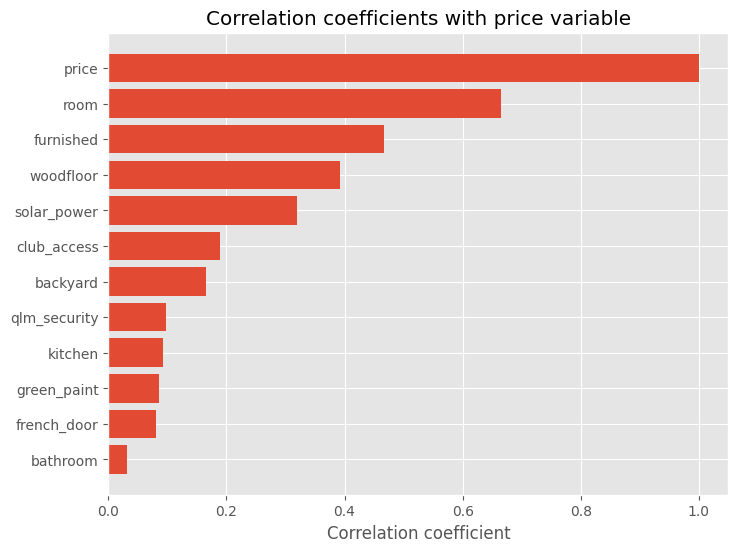

In [22]:
corr_dict = {}
corr_dict['room'] = 0.664687
corr_dict['bathroom'] = 0.032077
corr_dict['kitchen'] = 0.092177
corr_dict['french_door'] = 0.080310
corr_dict['backyard'] = 0.165639
corr_dict['furnished'] = 0.466078
corr_dict['green_paint'] = 0.084959
corr_dict['solar_power'] = 0.320036
corr_dict['woodfloor'] = 0.393021
corr_dict['qlm_security'] = 0.096911
corr_dict['club_access'] = 0.189243
corr_dict['price'] = 1.000000
sorted_corr = sorted(corr_dict.items(), key=lambda x: x[1])
var_names = [item[0] for item in sorted_corr]
corr_coeffs = [item[1] for item in sorted_corr]
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(var_names, corr_coeffs)
ax.set_xlabel('Correlation coefficient')
ax.set_title('Correlation coefficients with price variable')
plt.show()

In [23]:
train_X = train.drop('price', axis=1)
test_X = test.drop('price', axis=1)
train_Y = train['price']
test_Y = test['price']

In [24]:
train_Y

0       6835
1       9005
2       9005
3       5105
4       9105
        ... 
2995    4825
2996    6755
2997    7565
2998    9135
2999    8955
Name: price, Length: 3000, dtype: int64

In [25]:
test_Y.mean()

8601.863863863864

In [26]:
train_X.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access
0,3,1,2,1,1,0,1,0,0,1,1
1,5,2,2,2,1,0,0,0,0,1,1
2,5,2,2,2,1,0,0,0,0,1,1
3,1,2,1,2,0,0,0,0,1,1,0
4,2,1,2,3,1,1,0,0,1,1,0


Building a Regression Model

In [27]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_X, train_Y)

In [28]:
reg

LinearRegression()

In [29]:
# use the linear regression model to predict
predicted = reg.predict(test_X)

In [31]:
print(reg.score(train_X, train_Y))

1.0


In [32]:
print(mean_absolute_error(test_Y, predicted))

13.000000000000469


In [33]:
predicted.mean()

8588.863863863864

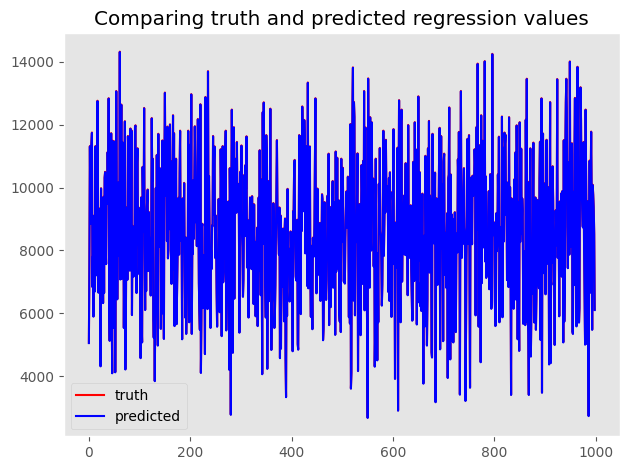

In [34]:
make_plot(test_Y, predicted)

###Random Forest Regression

In [35]:
# Now let's do random forest regression
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor().fit(train_X, train_Y)
rf_predicted = rf_reg.predict(test_X)
print(rf_reg.score(train_X, train_Y))
print(mean_absolute_error(test_Y, rf_predicted))

0.9984619754547881
170.49909909909908


In [37]:
rf_predicted.mean()

8586.34034034034

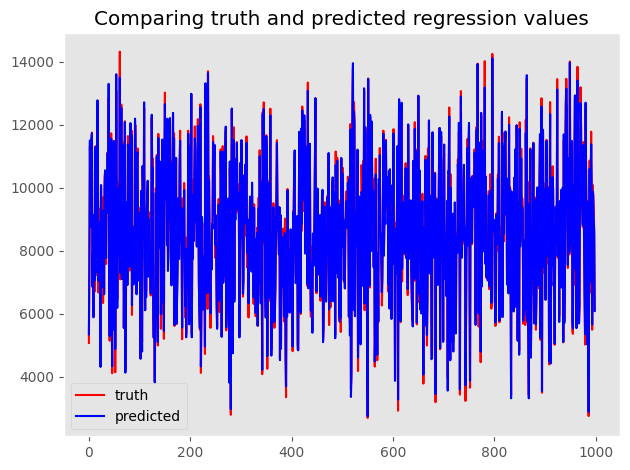

In [38]:
make_plot(test_Y, rf_predicted)

In [39]:
rf_reg.feature_importances_

array([0.42862102, 0.00476125, 0.01120758, 0.00887067, 0.01454337,
       0.19693646, 0.00695617, 0.11422441, 0.17889868, 0.00885172,
       0.02612867])

In [40]:
train.columns

Index(['room', 'bathroom', 'kitchen', 'french_door', 'backyard', 'furnished',
       'green_paint', 'solar_power', 'woodfloor', 'qlm_security',
       'club_access', 'price'],
      dtype='object')

In [42]:
rf_importances = rf_reg.feature_importances_
rf_reg.feature_names_in_
ranks_and_features = zip(rf_importances, rf_reg.feature_names_in_)
ranks_and_features = sorted(ranks_and_features,reverse=True)
for x, y in ranks_and_features:
    print(x, y)

0.4286210234492395 room
0.1969364564400471 furnished
0.17889867650215827 woodfloor
0.11422440924012686 solar_power
0.026128674118870703 club_access
0.014543374472055458 backyard
0.011207581840227689 kitchen
0.00887066563536842 french_door
0.00885172230122188 qlm_security
0.006956170646513181 green_paint
0.004761245354171053 bathroom


In [43]:
keys = [k[1] for k in ranks_and_features ] [::-1]
keys

['bathroom',
 'green_paint',
 'qlm_security',
 'french_door',
 'kitchen',
 'backyard',
 'club_access',
 'solar_power',
 'woodfloor',
 'furnished',
 'room']

In [44]:
values = [k[0] for k in ranks_and_features ][::-1]
values

[0.004761245354171053,
 0.006956170646513181,
 0.00885172230122188,
 0.00887066563536842,
 0.011207581840227689,
 0.014543374472055458,
 0.026128674118870703,
 0.11422440924012686,
 0.17889867650215827,
 0.1969364564400471,
 0.4286210234492395]

<BarContainer object of 11 artists>

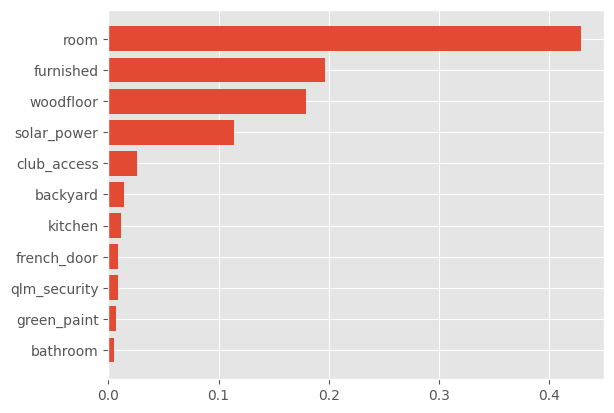

In [45]:
plt.barh(keys, values)

###KNN Regressor

0.9471383275821861
471.3446303446304


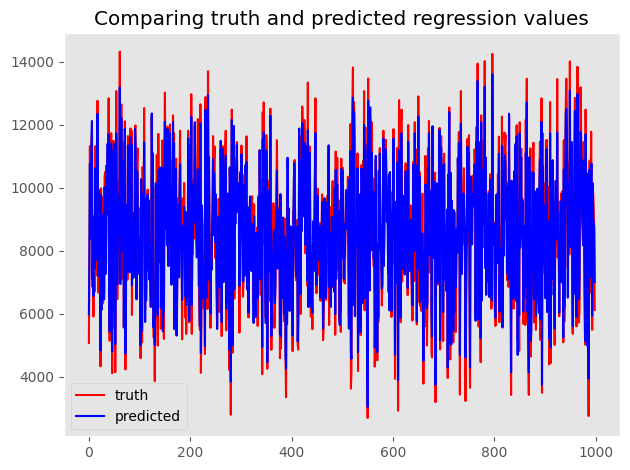

In [46]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=7)
neigh.fit(train_X, train_Y)
knn_predicted = neigh.predict(test_X)
print(neigh.score(train_X, train_Y))
print(mean_absolute_error(test_Y, knn_predicted))
make_plot(test_Y, knn_predicted)

In [48]:
knn_predicted.mean()

8558.843843843844

###XGB Regressor

In [49]:
import xgboost as xgb
xgb_reg =  xgb.XGBRegressor().fit(train_X, train_Y)
xgb_predicted = xgb_reg.predict(test_X)
print("R-sqaured:", xgb_reg.score(train_X, train_Y))
print("Mean Absolute Error:", mean_absolute_error(test_Y, xgb_predicted))
xgb_importances = xgb_reg.feature_importances_
xgb_ranks_and_features = zip(xgb_importances, rf_reg.feature_names_in_)
xgb_ranks_and_features = sorted(xgb_ranks_and_features,reverse=True)
print("\nFeature Importances with XGBoost:")
for x, y in xgb_ranks_and_features:
    print(x, y)

R-sqaured: 0.9997084329328167
Mean Absolute Error: 60.142959121230604

Feature Importances with XGBoost:
0.29977584 room
0.241706 woodfloor
0.2364698 furnished
0.11214046 solar_power
0.026595302 club_access
0.019723801 backyard
0.01696462 qlm_security
0.014970071 kitchen
0.011910282 french_door
0.011131189 green_paint
0.0086126365 bathroom


<BarContainer object of 11 artists>

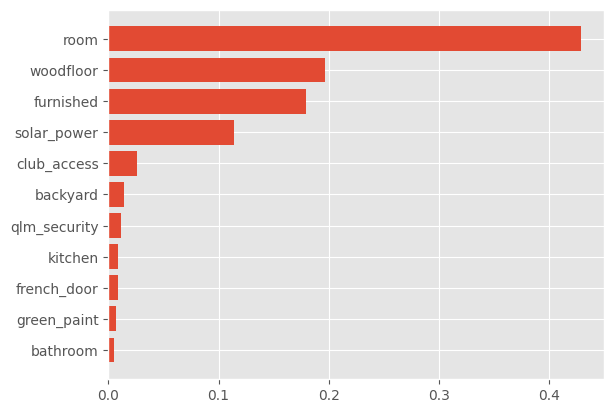

In [63]:
plt.barh(keys,values)

Price prediction using XGB regressor

In [50]:
xgb_predicted

array([ 5148.416 ,  7656.7046, 11278.064 ,  8745.116 , 11127.099 ,
       11222.3955, 11739.574 ,  6848.711 ,  7767.5234,  5909.1157,
        9033.005 ,  8422.511 ,  6652.882 , 11309.728 ,  7162.8477,
        9100.832 ,  8863.883 , 12851.478 ,  9680.847 ,  6732.82  ,
        9311.709 ,  7718.399 ,  7035.023 ,  4374.608 ,  9984.954 ,
        6940.473 ,  7280.7275,  8873.837 ,  6341.4707,  9618.7705,
        6653.249 , 10322.769 , 10497.256 ,  8144.93  ,  7646.1826,
       10347.003 ,  9462.381 , 11102.428 ,  9790.52  , 12912.751 ,
        6383.6855,  5167.9097,  9914.373 ,  8879.723 , 11695.252 ,
        6201.2173,  4218.778 , 11469.141 ,  9645.313 ,  5652.9897,
       11424.627 , 10264.246 ,  4340.5767,  7817.545 , 12937.625 ,
        9641.915 ,  6529.354 ,  8377.5205, 10059.843 ,  7821.1494,
        8286.929 , 14146.023 ,  7092.825 ,  8442.184 , 12650.5205,
        6948.8447, 11425.142 , 10575.425 , 10027.336 ,  5470.0005,
        8214.382 , 12130.265 ,  4323.3804,  5942.8584,  9350.5

In [51]:
xgb_predicted.mean()

8590.755

Looking at the output from the Xgboost algorithm, the predicted prices are closer to the given prices. It had a high R-squared of 0.999708 and a low MAE of 60.1429. It has a lower error rate compared to the other algorithms.

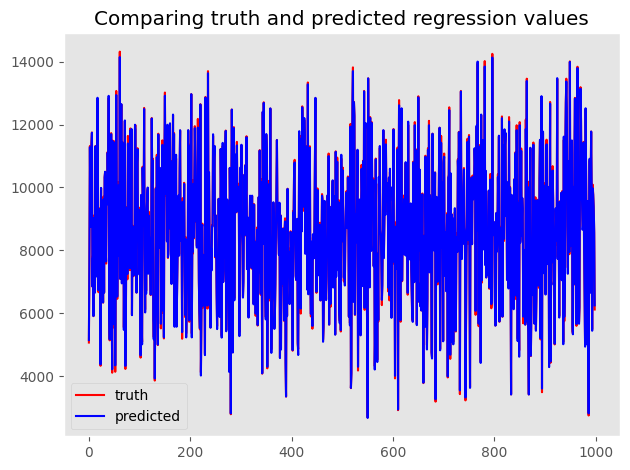

In [52]:
make_plot(test_Y, xgb_predicted)

###Plotting the Mean Absolute Error of all algorithms

Text(0.5, 1.0, 'MAE for various regression algorithms')

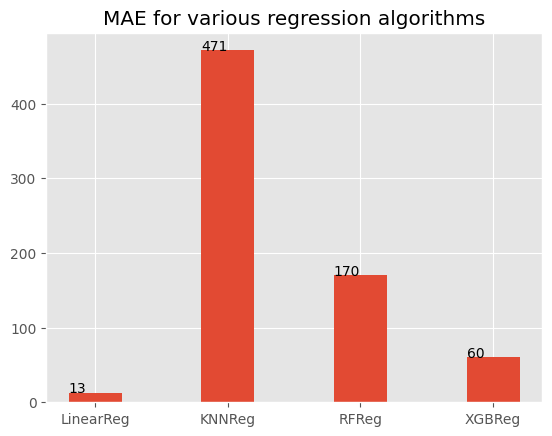

In [53]:
lin_mae = mean_absolute_error(test_Y, predicted)
knn_mae = mean_absolute_error(test_Y, knn_predicted)
rf_mae = mean_absolute_error(test_Y, rf_predicted)
xgb_mae = mean_absolute_error(test_Y, xgb_predicted)
errors = [lin_mae, knn_mae, rf_mae, xgb_mae]
labels = ["LinearReg", "KNNReg", "RFReg", "XGBReg"]
bars = plt.bar(labels, errors, width=0.4)
for bar in bars:
    yval = int(bar.get_height())
    plt.text(bar.get_x(), yval + .005, yval)
#plt.grid()
plt.title("MAE for various regression algorithms")